In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def f_to_learn(x, a = 200.0, b = 0.6, c = 1, d = -0.5):
    # Define the coefficients of the third-degree polynomial equation
    return a + b*x + c*x**2 + d*x**3

def gen_data(domain, N=1000):
    x = np.random.uniform(min(domain),max(domain),1000)
    mean = 0
    std_dev = 5.0 
    f_to_learn(x)+np.random.normal(mean, std_dev, x.shape)
    
    return x, f_to_learn(x)+np.random.normal(mean, std_dev, x.shape)

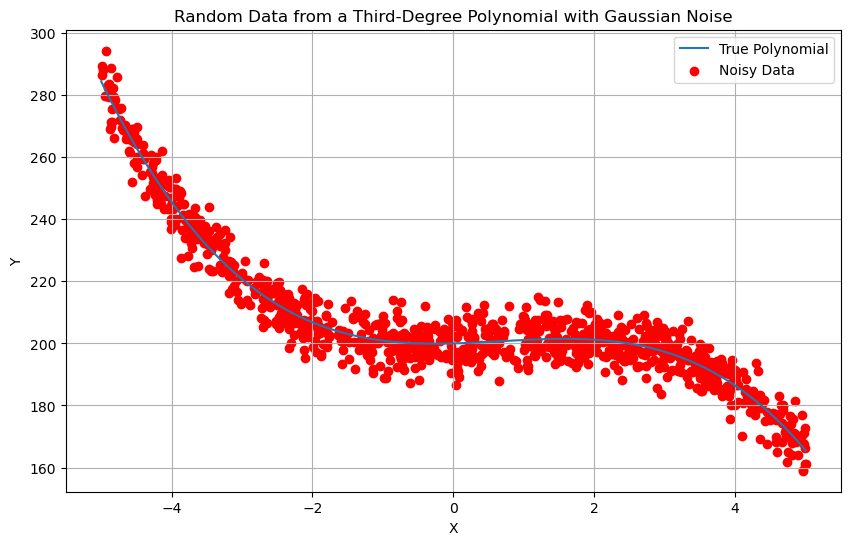

In [2]:
# Generate x values (input data)
x_true = np.linspace(-5, 5, 100)  # Adjust the range as needed

# Generate y values (output data) using the polynomial equation
y_true = f_to_learn(x_true)

# Generate data with noise from the polynomial equation
x_data, y_data = gen_data(x_true)

# Plot the original polynomial and the noisy data
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label="True Polynomial")
plt.scatter(x_data, y_data, c='r', marker='o', label="Noisy Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Random Data from a Third-Degree Polynomial with Gaussian Noise")
plt.grid(True)
plt.show()

a tensor(1.)
b tensor(1.)
c tensor(1.)
d tensor(1.)
Epoch [1000/25000], Loss: 18509.5215
Epoch [2000/25000], Loss: 14598.0312
Epoch [3000/25000], Loss: 13347.9668
Epoch [4000/25000], Loss: 12075.3047
Epoch [5000/25000], Loss: 10794.1436
Epoch [6000/25000], Loss: 9559.9990
Epoch [7000/25000], Loss: 8395.3096
Epoch [8000/25000], Loss: 7307.9414
Epoch [9000/25000], Loss: 6300.1411
Epoch [10000/25000], Loss: 5372.1934
Epoch [11000/25000], Loss: 4523.7119
Epoch [12000/25000], Loss: 3754.0427
Epoch [13000/25000], Loss: 3062.3704
Epoch [14000/25000], Loss: 2447.7349
Epoch [15000/25000], Loss: 1909.0077
Epoch [16000/25000], Loss: 1444.8022
Epoch [17000/25000], Loss: 1053.4045
Epoch [18000/25000], Loss: 732.6396
Epoch [19000/25000], Loss: 479.6503
Epoch [20000/25000], Loss: 290.5853
Epoch [21000/25000], Loss: 160.1127
Epoch [22000/25000], Loss: 80.6469
Epoch [23000/25000], Loss: 41.3955
Epoch [24000/25000], Loss: 28.0446
Epoch [25000/25000], Loss: 25.7389


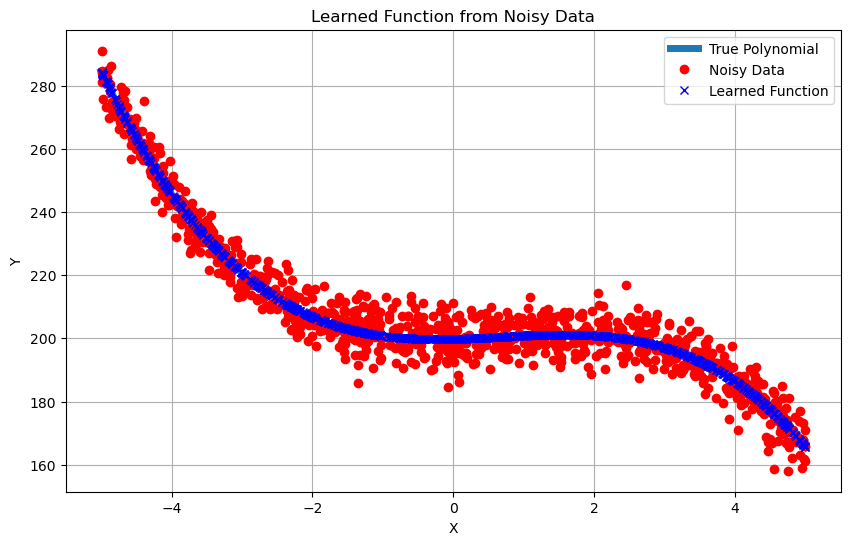

In [3]:
x_data, y_data = gen_data(x_true)

# Convert NumPy arrays to PyTorch tensors
x_tensor = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

# Define a simple neural network model
class PolynomialModel(nn.Module):
    def __init__(self):
        super(PolynomialModel, self).__init__()
        
        self.a = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))  # Parameter 'a'
        self.b = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))  # Parameter 'b'
        self.c = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))  # Parameter 'c'
        self.d = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))  # Parameter 'd'

    def forward(self, x):
        return self.a + x * self.b + x**2 * self.c + x**3 * self.d

# Initialize the model
model = PolynomialModel()

for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

# Define the loss function (mean squared error) and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam optimizer

# Training loop
num_epochs = 25000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the learned function
x_test = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_pred = model(x_test).detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label="True Polynomial", lw=5)
plt.plot(x_data, y_data, 'ro', label='Noisy Data')
plt.plot(x_data, y_pred, 'xb-', lw=0, label='Learned Function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Learned Function from Noisy Data")
plt.grid(True)
plt.show()